In [96]:

import numpy as numpy
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
import pandas as pd


UsageError: Line magic function `%` not found.


In [77]:
# read the file
output = pd.read_csv("./output.csv")

In [78]:
output

,Body,Px,Py,Pz,Vx,Vy,Vz,Time
0,0,-2.683989e+07,1.470994e+08,-4.045984,1.062760e+04,-5.841443e+04,0.001607,0.00
1,1,-3.200000e-04,3.320760e+00,-0.000000,-3.199900e-02,3.320760e+02,-0.000000,0.00
2,2,-3.220000e-04,-8.945643e+07,-0.000000,-3.224300e-02,-8.984083e+09,-0.000000,0.00
3,0,-2.683968e+07,1.470982e+08,-4.045952,2.128506e+04,-1.168240e+05,0.003213,0.01
4,1,-9.600000e-04,6.643213e+00,-0.000000,-6.399800e-02,3.322453e+02,-0.000000,0.01
...,...,...,...,...,...,...,...,...
29995,1,-3.199003e+05,1.785455e+06,-0.048215,-3.387205e+03,1.888547e+04,-0.000511,99.98
29996,2,-4.725248e+00,-8.982909e+11,-0.000001,-4.713600e-02,-8.983811e+09,-0.000000,99.98
29997,0,1.065286e+11,-5.835156e+11,16055.727875,1.128123e+09,-6.179350e+09,170.027955,99.99
29998,1,-3.199341e+05,1.785644e+06,-0.048220,-3.387205e+03,1.888547e+04,-0.000511,99.99


In [79]:
output_groupped = output.groupby("Body")

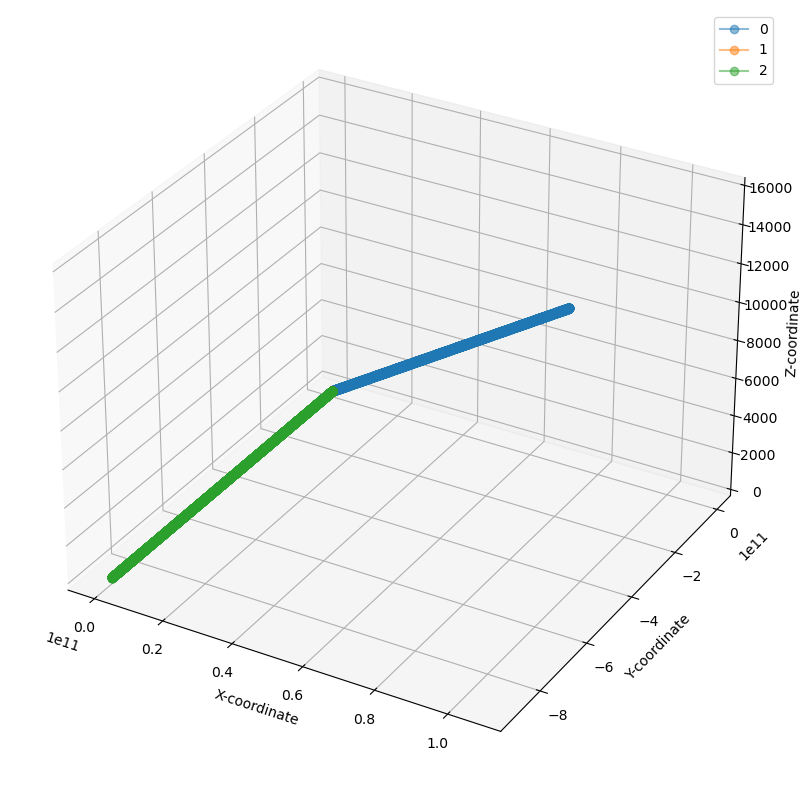

In [86]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection = '3d')

for group_name, group_data in output_groupped:
    ax.plot(group_data['Px'], group_data['Py'], group_data['Pz'], marker = 'o', linestyle = '-', label = group_name, alpha=0.5)
ax.legend()
ax.set_xlabel("X-coordinate")
ax.set_ylabel("Y-coordinate")
ax.set_zlabel("Z-coordinate")
plt.show()

In [97]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection = '3d')
plots = {}

for group_name, group_data in output_groupped:
  plots[group_name], = ax.plot([],[],[], marker = 'o', label = group_name)

ax.set_xlim(output['Px'].min(), output['Px'].max())
ax.set_xlim(output['Py'].min(), output['Py'].max())
ax.set_xlim(output['Pz'].min(), output['Pz'].max())

ax.legend()
ax.set_xlabel("X-coordinate")
ax.set_ylabel("Y-coordinate")
ax.set_zlabel("Z-coordinate")

def update(frame):
    current_time = frame
    for group_name,group_data in output_groupped:
        current_data = group_data[group_data["Time"] <= current_time]
        plots[group_name].set_data(current_data["Px"], current_data["Py"])
        plots[group_name].set_3d_properties(current_data["Pz"])
    return plots.values()

ani = FuncAnimation(fig, update, frames = output["Time"].unique(),blit = False, interval =200)
writer = PillowWriter(fps=10)
file_path = "./animation.gif"
ani.save(file_path,writer=writer)

<IPython.core.display.Javascript object>

/usr/lib/python3/dist-packages/matplotlib/animation.py:880: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


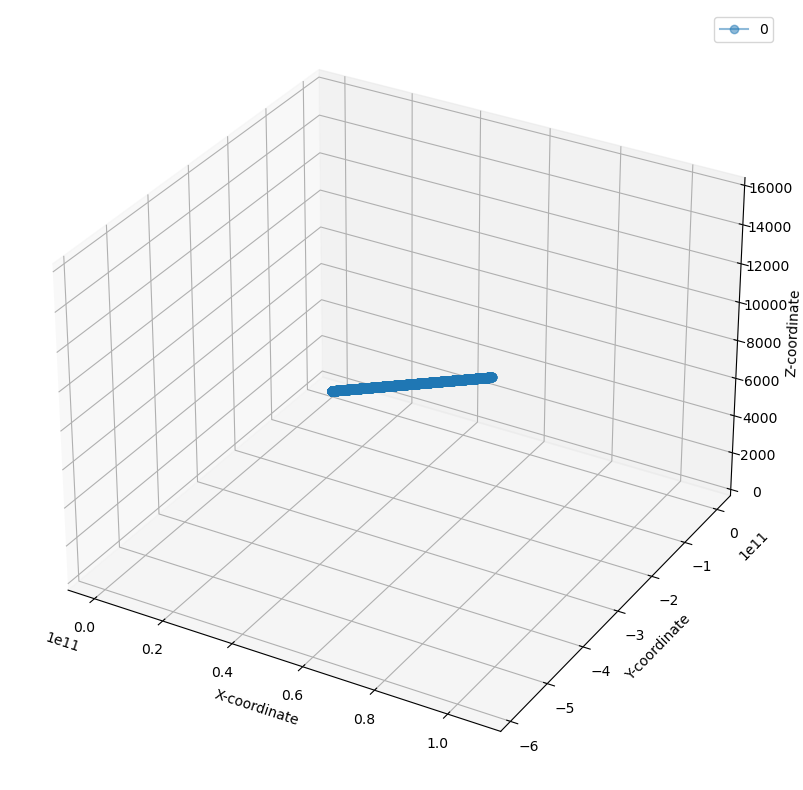

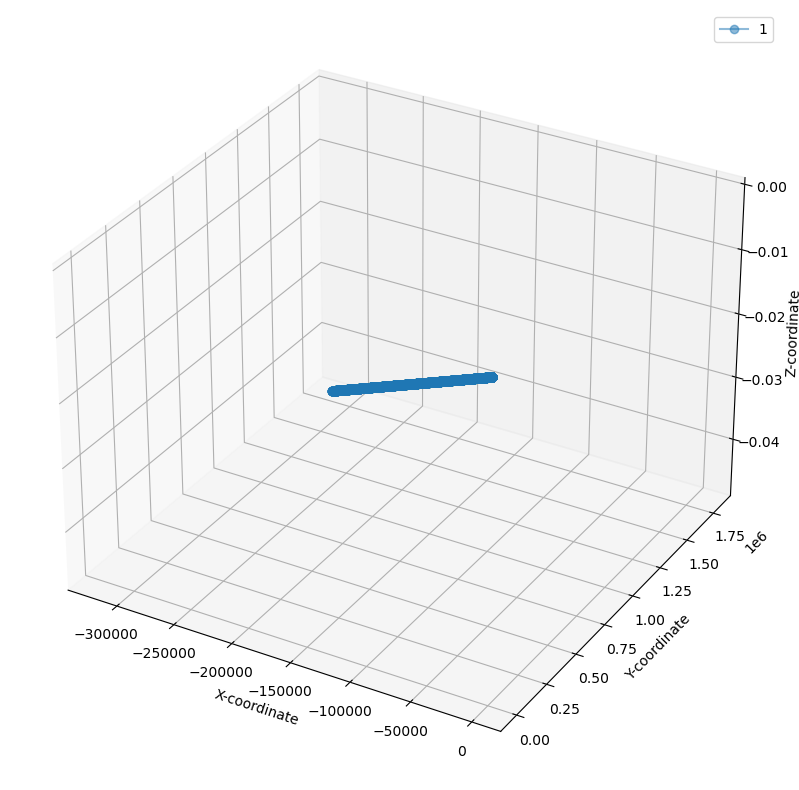

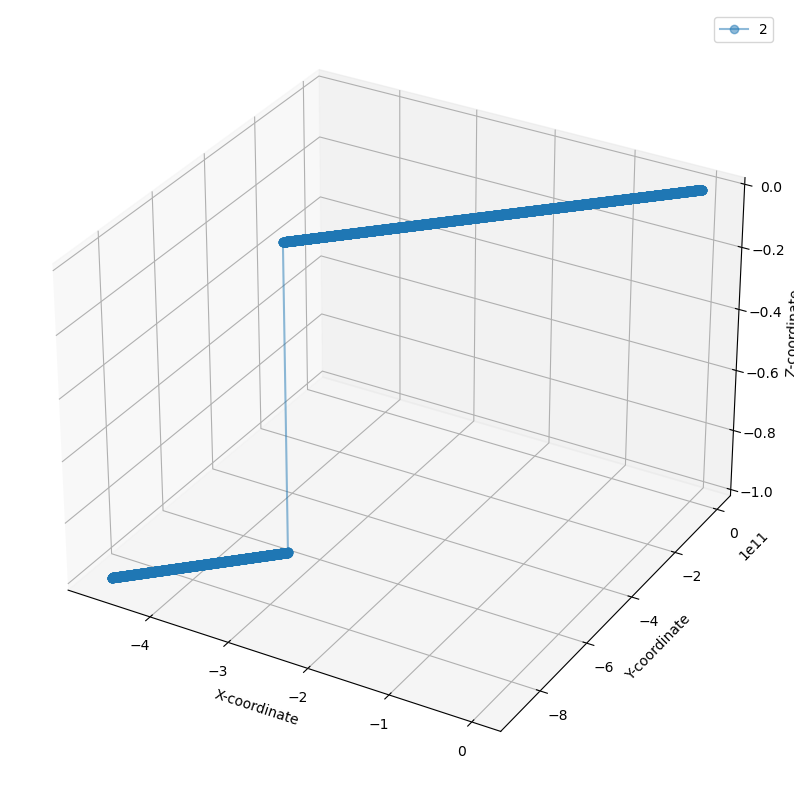

In [85]:
for group_name, group_data in output_groupped:
    fig = plt.figure(figsize = (20,10))
    ax = fig.add_subplot(111, projection = '3d')
    ax.plot(group_data['Px'], group_data['Py'], group_data['Pz'], marker = 'o', linestyle = '-', label = group_name, alpha=0.5)
    ax.legend()
    ax.set_xlabel("X-coordinate")
    ax.set_ylabel("Y-coordinate")
    ax.set_zlabel("Z-coordinate")
    plt.show()